<a href="https://colab.research.google.com/github/maycmesquia/Data_Viz/blob/main/Classificando_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados e Contatos

Ola, sou *Maycon Douglas*, Cientista Contábil e Cientista de Dados (Data Scientist)!

Acredito fortemente que: conhecer a causa é mais importante para solucionar o problema!

Cada vez mais devemos buscar informação e conhecimento, pois e atraves deles que podemos discernir o boato do fato, a verdade da mentira!

**Contatos:**

- [Kaggle](https://www.kaggle.com/maycondsmendes)

- [Linkedin](https://www.linkedin.com/in/maycon-douglas-data-science/)

- [Github](https://github.com/maycmesquia)

- E-mail: [maycmesquita@gmail.com](https://maycmesquita@gmail.com)

# Descrição:

## 1.1 - Introdução ao conjunto de dados

O conjunto de dados [Iris](https://archive-beta.ics.uci.edu/ml/datasets/iris), é um pequeno conjunto de dados de Fisher, 1936.

Ele foi um dos primeiros a ser usado para classificação de especies de acordo com caracteristicas mensuraveis, e tambem é utilizado para mensuração de metodologias de classificação

Esse conjunto de dados foi retirado de [UC Irvine - Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/iris)


### Preparando ambiente basico:

Importando blibiotecas basicas: Pandas, Numpy, Matplotlib e Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('darkgrid')

### Importando dados - Jupyter:

In [ ]:
end = ''
colunas=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'Class']
df_iris = pd.read_csv("Iris.data", names=colunas)

### Importando dados - Colab:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
end = '/content/drive/Othercomputers/Meu laptop/Dados/Classificando Iris'
colunas=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'Class']
df_iris = pd.read_csv(end + '/iris.data', names=colunas)

### Observando os dados do conjunto:

Como podemos ver no conjunto Iris, cada amostra tem 4 caracteristicas, que são os comprimentos das sepalas, e uma variavel de classificação, a qual pode ser estimada de acordo com os comprimentos das sepalas.

Alem disso podemos obervar no Data Frame 2 que todos os comprimentos de sepalas contem dados do tipo float64, já a Class é do tipo objeto, e ela esta classificada em apenas tres especies, alem disso não há valores ausentes (NaN) neste conjunto.

In [ ]:
# Data Frame 1
df_iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Data Frame 2
pd.DataFrame([df_iris.nunique(), df_iris.dtypes, df_iris.isna().sum()], 
             index=["Dados Unicos", "Tipo de Dado", "Valores Ausentes NaN"]).T

,Dados Unicos,Tipo de Dado,Valores Ausentes NaN
sepal length in cm,35,float64,0
sepal width in cm,23,float64,0
petal length in cm,43,float64,0
petal width in cm,22,float64,0
Class,3,object,0


## 1.2 - Objetivo desta analise

Tendo como objetivo realizar uma analise exploratoria do conjunto de dados, afim de revisar ferramentas de data visualization, e por ultimo utilizar ferramentas de classificação para tentar classificar alguns dos dados do conjunto.

### Importando outras blibiotecas:

In [6]:
from scipy.stats import normaltest # Teste de hipotese de distribuição normal

## 2 - Analise Estatistica:

Estatistica descritiva do conjunto de dados:

In [10]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Afim de averiguar a distribuição das amostras de acordo com seus valores, iremos aplicar um teste de hipotese de distribuição Normal.

sepal length in cm  : 0.057 - Distribuição Normal
sepal width in cm   : 0.167 - Distribuição Normal
petal length in cm  : 0.000 - Distribuição não é Normal
petal width in cm   : 0.000 - Distribuição não é Normal


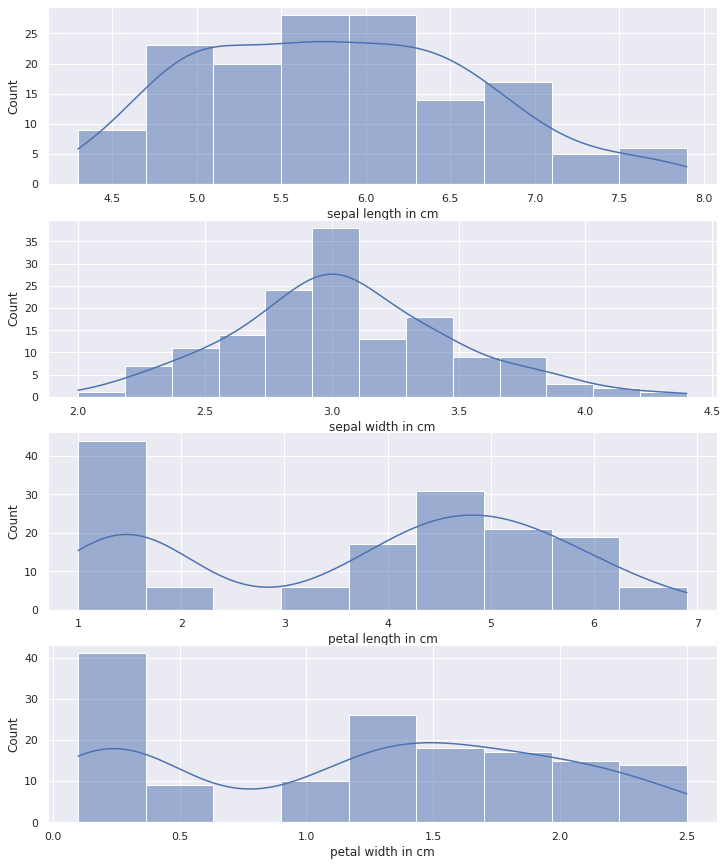

In [11]:
janela, graficos = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))

i = 0
for feature in df_iris.columns:
    if df_iris[feature].dtypes == float:
        _, p = normaltest(df_iris[feature])
        if p > 0.05:
            distribuicao = 'Distribuição Normal'
        else:
            distribuicao = 'Distribuição não é Normal'
        print(f'{feature: <20}:{p: 5.3f} - {distribuicao: >}')
        sns.histplot(df_iris[feature], kde=True, ax=graficos[i])
        i += 1
    else:
        pass
plt.show()

# Averiguando a distribuição das amostras

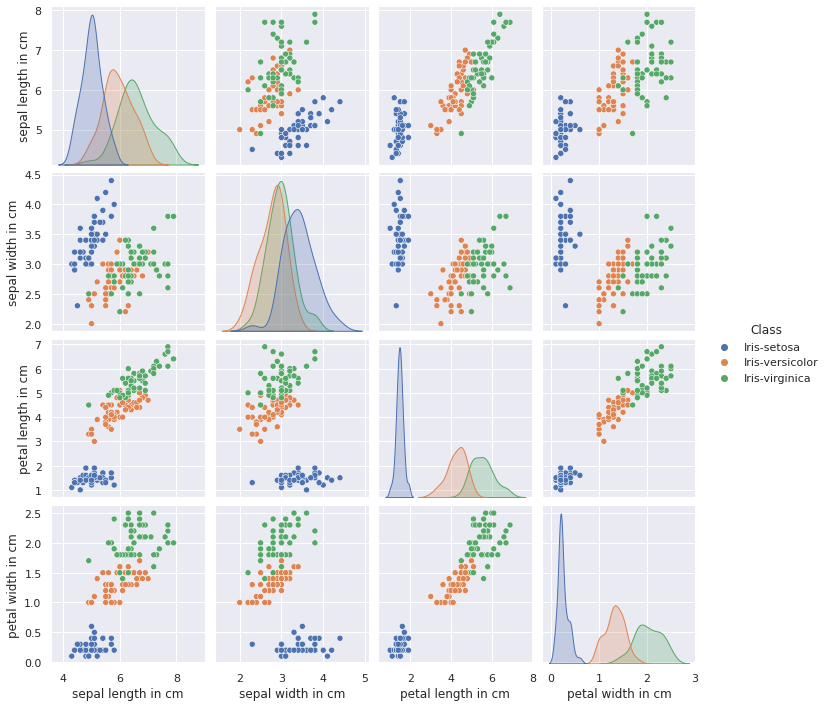

In [13]:
sns.pairplot(data=df_iris, hue='Class')

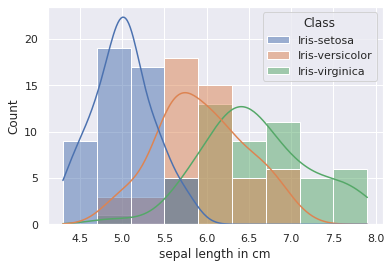

In [15]:
sns.histplot(data=df_iris, x='sepal length in cm', hue='Class', kde=True)